Problem 1

**1a)**  
No, the error terms μ(i) in the erroneously estimated model (2) do not necessarily satisfy the standard assumptions of classical linear regression (e.g., zero conditional mean, homoscedasticity, no autocorrelation), even if the true error terms ε(i) in model (1) do. This is because the omission of the relevant variable z(i) causes μ(i) to absorb the effect of z(i), leading to μ(i) = δ z(i) + ε(i). If z(i) is correlated with any of the included regressors (x(i) or w(i)), then μ(i) will be correlated with the regressors in model (2), violating the assumption that the error term has a zero conditional mean. This introduces omitted variable bias and potential violations of other assumptions.

**1b)**  
The estimates of α, β, and γ from model (2) will generally be biased and inconsistent compared to those from model (1), due to omitted variable bias. Specifically:  
- The estimate of α may be biased because the omitted variable z(i) could be correlated with the intercept.  
- The estimate of β will be biased unless z(i) is uncorrelated with x(i).  
- The estimate of γ will be biased unless z(i) is uncorrelated with w(i).  

The bias arises because the effect of z(i) (through δ) is improperly attributed to the included variables. The variance of the estimators may also be affected, but the primary issue is bias.

**1c)**  
The estimates of α, β, and γ from model (2) will be the same as those from model (1) if the omitted variable z(i) is uncorrelated with both x(i) and w(i). In this case, the omission of z(i) does not cause bias because there is no confounding between z(i) and the included regressors. This ensures that the zero conditional mean assumption holds for μ(i) in model (2), as the effect of z(i) is not conflated with x(i) or w(i).

**1d)**

In [2]:
import numpy as np
import statsmodels.api as sm

In [4]:
np.random.seed(42)

# Parameters
n = 1000  # Sample size
a = 1     # True intercept
b = 2     # True coefficient for X
c = 3     # True coefficient for Z

# Generate correlated X and Z
corr = 0.7  # Correlation between X and Z
cov = [[1, corr], [corr, 1]]
X, Z = np.random.multivariate_normal([0, 0], cov, n).T

# Generate error term
e = np.random.normal(0, 1, n)

# Create Y according to true model: Y = a + b*X + c*Z + e
Y = a + b*X + c*Z + e

# Estimate full model (with both X and Z)
X_full = sm.add_constant(np.column_stack((X, Z)))
model_full = sm.OLS(Y, X_full).fit()
b_full = model_full.params[1]

# Estimate reduced model (omitting Z)
X_reduced = sm.add_constant(X)
model_reduced = sm.OLS(Y, X_reduced).fit()
b_reduced = model_reduced.params[1]

print("True value of b:", b)
print("Estimated b from full model:", b_full)
print("Estimated b from reduced model (omitting Z):", b_reduced)
print("Bias in reduced model:", b_reduced - b)

# Repeat with larger sample size
n_large = 10000
X_large, Z_large = np.random.multivariate_normal([0, 0], cov, n_large).T
e_large = np.random.normal(0, 1, n_large)
Y_large = a + b*X_large + c*Z_large + e_large

# Estimate models with larger sample
X_full_large = sm.add_constant(np.column_stack((X_large, Z_large)))
model_full_large = sm.OLS(Y_large, X_full_large).fit()
b_full_large = model_full_large.params[1]

X_reduced_large = sm.add_constant(X_large)
model_reduced_large = sm.OLS(Y_large, X_reduced_large).fit()
b_reduced_large = model_reduced_large.params[1]

print("\nWith larger sample size (n=10,000):")
print("Estimated b from full model:", b_full_large)
print("Estimated b from reduced model (omitting Z):", b_reduced_large)
print("Bias in reduced model:", b_reduced_large - b)

True value of b: 2
Estimated b from full model: 1.9627995207032205
Estimated b from reduced model (omitting Z): 3.9779140119952894
Bias in reduced model: 1.9779140119952894

With larger sample size (n=10,000):
Estimated b from full model: 1.9716424068135636
Estimated b from reduced model (omitting Z): 4.149762618336877
Bias in reduced model: 2.1497626183368768


Problem 2

2a) Sensitivity to Outliers in Regression Models

Regression models are highly sensitive to outliers, which are extreme observations that deviate observedly from the overall pattern of the data. Outliers can be categorized into two types: vertical outliers (extreme in the Y-direction given X) and leverage points (extreme in the X-direction). Vertical outliers primarily affect the residual variance and coefficient estimates, while leverage points can exert disproportionate influence on the regression line due to their extreme predictor values. The ordinary least squares (OLS) method is vulnerable to outliers because it minimizes the sum of squared residuals, meaning that large residuals (from outliers) have an exponentially greater effect on the parameter estimates. This can lead to biased coefficients, inflated standard errors, and reduced model fit. To mitigate this, analysts often use robust regression techniques (e.g., Huber loss, M-estimation) that downweight outliers, or employ diagnostic tools (e.g., Cook’s distance, studentized residuals) to detect and address influential observations.

**2b)**

Clean data coefficients:
 [2.00742783 2.85674284]
Contaminated data coefficients:
 [2.48891317 3.03829026]


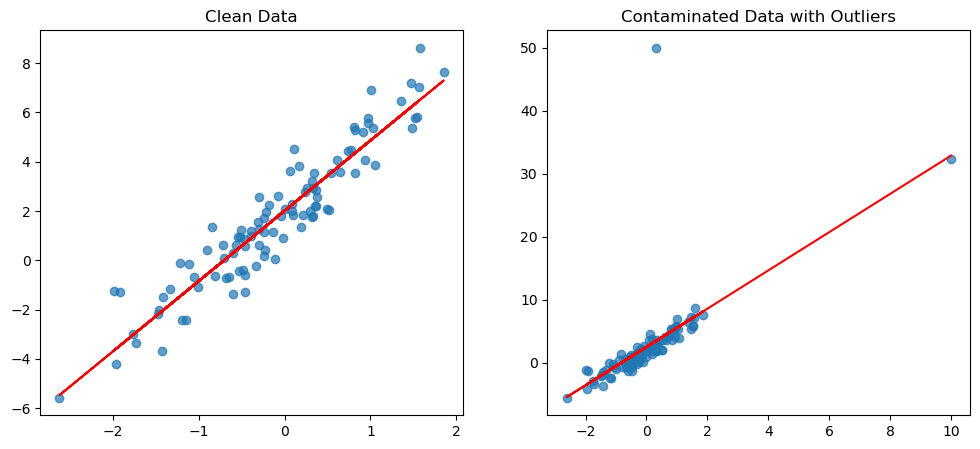

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate baseline data
np.random.seed(42)
n = 100
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)
Y_clean = 2 + 3 * X + epsilon

# Introduce outliers
Y_contaminated = Y_clean.copy()
X_contaminated = X.copy()

# Vertical outlier: change Y for observation 50 to 50
Y_contaminated[50] = 50

# Leverage point: add extreme X (10) with valid Y
X_contaminated = np.append(X_contaminated, 10)
Y_contaminated = np.append(Y_contaminated, 2 + 3*10 + np.random.normal(0,1))

# Fit OLS to clean data
X_with_const_clean = sm.add_constant(X)
model_clean = sm.OLS(Y_clean, X_with_const_clean).fit()

# Fit OLS to contaminated data
X_with_const_cont = sm.add_constant(X_contaminated)
model_cont = sm.OLS(Y_contaminated, X_with_const_cont).fit()

# Compare results
print("Clean data coefficients:\n", model_clean.params)
print("Contaminated data coefficients:\n", model_cont.params)

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y_clean, alpha=0.7)
plt.plot(X, model_clean.predict(X_with_const_clean), color='red')
plt.title("Clean Data")

plt.subplot(1, 2, 2)
plt.scatter(X_contaminated, Y_contaminated, alpha=0.7)
plt.plot(X_contaminated, model_cont.predict(X_with_const_cont), color='red')
plt.title("Contaminated Data with Outliers")
plt.show()

The simulation shows that the coefficient estimates shift significantly in the contaminated data due to outliers. The vertical outlier pulls the regression line upward, while the leverage point tilts the line toward its extreme X-value. This demonstrates how outliers can distort inference and lead to erroneous conclusions. 

Probelm 3

In [6]:
import pandas as pd

In [8]:
data = pd.read_csv(r"C:\Users\abarr\Downloads\FE-GWP1_model_selection_1.csv")

In [9]:
data.head()

,Y,X1,X2,X3,X4,X5
0,3.388410,0.017954,-0.800583,-0.352454,2.187210,1.014887
1,0.287191,0.083057,-0.597947,-0.357639,-1.630284,0.221841
2,3.989645,-0.923437,-1.386575,1.180202,0.632606,-1.576638
3,-2.959602,-0.313775,2.955133,-1.798692,-2.117621,0.159291
4,0.529773,0.388996,1.019611,0.472062,0.590497,0.877048


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools

# Approach 1: Backward Elimination with p-values
def backward_elimination(data, target, predictors, significance_level=0.05):
    while len(predictors) > 0:
        # Fit model with current predictors
        formula = f"{target} ~ {' + '.join(predictors)}"
        model = ols(formula, data=data).fit()
        
        # Get p-values and find the highest
        p_values = model.pvalues[1:]  # exclude intercept
        max_p = p_values.max()
        
        if max_p > significance_level:
            # Remove predictor with highest p-value
            remove_predictor = p_values.idxmax()
            predictors.remove(remove_predictor)
            print(f"Removed {remove_predictor} (p-value: {max_p:.4f})")
        else:
            break
    
    return model

# Initial predictors
predictors = ['X1', 'X2', 'X3', 'X4', 'X5']
final_model_backward = backward_elimination(data, 'Y', predictors.copy())
print("\nFinal model from backward elimination:")
print(final_model_backward.summary())

# Approach 2: Stepwise Selection using AIC
def stepwise_selection(data, target, predictors, significance_level=0.05):
    initial_predictors = []
    current_predictors = initial_predictors.copy()
    best_aic = float('inf')
    
    while True:
        # Forward step
        remaining_predictors = list(set(predictors) - set(current_predictors))
        new_predictor = None
        
        for predictor in remaining_predictors:
            try_predictors = current_predictors + [predictor]
            formula = f"{target} ~ {' + '.join(try_predictors) if try_predictors else '1'}"
            model = ols(formula, data=data).fit()
            
            if model.aic < best_aic:
                best_aic = model.aic
                new_predictor = predictor
        
        if new_predictor:
            current_predictors.append(new_predictor)
            print(f"Added {new_predictor} (AIC: {best_aic:.2f})")
            continue
        
        # Backward step
        worst_predictor = None
        for predictor in current_predictors:
            try_predictors = [p for p in current_predictors if p != predictor]
            formula = f"{target} ~ {' + '.join(try_predictors) if try_predictors else '1'}"
            model = ols(formula, data=data).fit()
            
            if model.aic < best_aic:
                best_aic = model.aic
                worst_predictor = predictor
        
        if worst_predictor:
            current_predictors.remove(worst_predictor)
            print(f"Removed {worst_predictor} (AIC: {best_aic:.2f})")
        else:
            break
    
    # Final model
    formula = f"{target} ~ {' + '.join(current_predictors)}"
    return ols(formula, data=data).fit()

final_model_stepwise = stepwise_selection(data, 'Y', predictors)
print("\nFinal model from stepwise selection:")
print(final_model_stepwise.summary())

# Compare models using various criteria
print("\nModel Comparison:")
print(f"Backward Elimination Model - AIC: {final_model_backward.aic:.2f}, "
      f"Adjusted R²: {final_model_backward.rsquared_adj:.4f}")
print(f"Stepwise Selection Model - AIC: {final_model_stepwise.aic:.2f}, "
      f"Adjusted R²: {final_model_stepwise.rsquared_adj:.4f}")

Removed X1 (p-value: 0.8805)

Final model from backward elimination:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           8.29e-21
Time:                        17:45:54   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Problem 4



4a) Elasticity Calculations

(a) 
y
=
2
+
0.8
x
y=2+0.8x

Elasticity: 
ε
=
d
y
d
x
⋅
x
y
=
0.8
⋅
x
y
ε= 
dx
dy
​
 ⋅ 
y
x
​
 =0.8⋅ 
y
x
​
 

Since 
y
=
2
+
0.8
x
y=2+0.8x, this gives: 
ε
=
0.8
x
2
+
0.8
x
ε= 
2+0.8x
0.8x
​
 

This is variable elasticity (depends on 
x
x).

(b) 
ln
⁡
(
y
)
=
0.1
+
0.4
x
ln(y)=0.1+0.4x

Differentiate both sides with respect to 
x
x:
1
y
d
y
d
x
=
0.4
⇒
d
y
d
x
=
0.4
y
y
1
​
  
dx
dy
​
 =0.4⇒ 
dx
dy
​
 =0.4y

Elasticity: 
ε
=
d
y
d
x
⋅
x
y
=
0.4
y
⋅
x
y
=
0.4
x
ε= 
dx
dy
​
 ⋅ 
y
x
​
 =0.4y⋅ 
y
x
​
 =0.4x

This is variable elasticity (depends on 
x
x).

(c) 
ln
⁡
(
y
)
=
0.1
+
0.25
ln
⁡
(
x
)
ln(y)=0.1+0.25ln(x)

Differentiate both sides with respect to 
x
x:
1
y
d
y
d
x
=
0.25
⋅
1
x
⇒
d
y
d
x
=
0.25
⋅
y
x
y
1
​
  
dx
dy
​
 =0.25⋅ 
x
1
​
 ⇒ 
dx
dy
​
 =0.25⋅ 
x
y
​
 

Elasticity: 
ε
=
d
y
d
x
⋅
x
y
=
0.25
⋅
y
x
⋅
x
y
=
0.25
ε= 
dx
dy
​
 ⋅ 
y
x
​
 =0.25⋅ 
x
y
​
 ⋅ 
y
x
​
 =0.25

This is constant elasticity (
ε
=
0.25
ε=0.25).

(d) 
y
=
0.15
+
1.2
ln
⁡
(
x
)
y=0.15+1.2ln(x)

Differentiate with respect to 
x
x:
d
y
d
x
=
1.2
⋅
1
x
dx
dy
​
 =1.2⋅ 
x
1
​
 

Elasticity: 
ε
=
d
y
d
x
⋅
x
y
=
1.2
x
⋅
x
y
=
1.2
y
ε= 
dx
dy
​
 ⋅ 
y
x
​
 = 
x
1.2
​
 ⋅ 
y
x
​
 = 
y
1.2
​
 

This is variable elasticity (depends on 
y
y).

4b) Correct Elasticity Measurement

The correct regression model for estimating constant elasticity is the log-log model (c), 
ln
⁡
(
y
)
=
0.1
+
0.25
ln
⁡
(
x
)
ln(y)=0.1+0.25ln(x), which yields a constant elasticity of 
ε
=
0.25
ε=0.25. This model directly provides the elasticity as the coefficient of 
ln
⁡
(
x
)
ln(x), representing the percentage change in 
y
y for a 1% change in 
x
x.

0.25
0.25

In [12]:
# Generate sample data for verification
np.random.seed(42)
x = np.linspace(1, 10, 100)
y = np.exp(0.1 + 0.25*np.log(x) + np.random.normal(0, 0.1, 100))

# Estimate log-log model
log_y = np.log(y)
log_x = np.log(x)
X = sm.add_constant(log_x)
model = sm.OLS(log_y, X).fit()

print("Estimated elasticity:", model.params[1])
print("Theoretical elasticity: 0.25")

Estimated elasticity: 0.25052871244469244
Theoretical elasticity: 0.25
